In [993]:
import requests
import pandas as pd
from pandas import json_normalize 

import numpy as np
import warnings
import base64

import time

import copy
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [1537]:
#store information for accessing legiscan data (https://api.legiscan.com/dl/LegiScan_API_User_Manual.pdf)
#LEGISCAN_API_KEY = 'e20c1cba6f52de997936a82ef7305435'
LEGISCAN_API_KEY = "9b14b6f4a89cfeb0fa7e61e98e46d9fd"
BASE_URL = 'https://api.legiscan.com/'

In [107]:
#state abbreviations to full names
state_dict = {
    # https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#States.
    "AK": "Alaska",
    "AL": "Alabama",
    "AR": "Arkansas",
    "AZ": "Arizona",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "IA": "Iowa",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "MA": "Massachusetts",
    "MD": "Maryland",
    "ME": "Maine",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MO": "Missouri",
    "MS": "Mississippi",
    "MT": "Montana",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "NE": "Nebraska",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NV": "Nevada",
    "NY": "New York",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PA": "Pennsylvania",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VA": "Virginia",
    "VT": "Vermont",
    "WA": "Washington",
    "WI": "Wisconsin",
    "WV": "West Virginia",
    "WY": "Wyoming",
    # https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#Federal_district.
    "DC": "District of Columbia",
    # https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#Inhabited_territories.
    "AS": "American Samoa",
    "GU": "Guam GU",
    "MP": "Northern Mariana Islands",
    "PR": "Puerto Rico PR",
    "VI": "U.S. Virgin Islands",
}

In [40]:
def get_sessions(state):
    """
    Helper function to obtain all available sessions in legiscan for a given state from Legiscan API

    Input: state (str): 2 character key for a state (e.g. IL)
    Output: state_df (pd df): dataframe containing session information
    """
    search_resp = requests.get(BASE_URL, params={
        'key': LEGISCAN_API_KEY,
        'op': 'getSessionList',
        'state': state.upper(),
    })
    
    session_data = search_resp.json()

    try:
        state_df = json_normalize(session_data, 'sessions')
        return state_df
    except KeyError as e:
        print(e)
        print(f"State {state} not found.")

In [243]:
def get_masterlist(state, year):
    """
    Function to obtain all available bills in a given state and year from Legiscan API

    Inputs:
        state (str): 2 character key for a state (e.g. IL)
        year (int): year to search for 
    Output: 
        session_df (pd df): dataframe of all available bills in a given year for a given state
        
    """
    state_sessions = session_ids[state]

    find_session = state_sessions[state_sessions["year_start"] == year]["session_id"]

    if len(find_session) > 0:
        session_id = find_session.values[0]
    else:
        print("hit")
        find_session = state_sessions[state_sessions["year_end"] == year]["session_id"]
        
        if len(find_session) == 0:
            print(f"No session available for {state}, start year {year}.")
            print(find_session) 
            return
        else:
            session_id = find_session.values[0]
            
    print(find_session)
    print(session_id)

    search_resp = requests.get(BASE_URL, params={
        'key': LEGISCAN_API_KEY,
        'op': 'getMasterList',
        'id': session_id,
    })
    
    bill_data = search_resp.json()
    
    bill_list = bill_data["masterlist"]

    session_info = bill_list.pop('session')
    i = 0
    all_bills = []
    for key in bill_list:
        all_bills.append(bill_list[key])

    try:
        session_df = json_normalize(all_bills)
        print(f"Session found for year {year} in state {state}")
        return session_df
        
    except KeyError as e:
        print(e)
        print(f"Session for year {year} and in state {state} not found.")

In [257]:
# #read in relevant environmental bills
# envb = pd.read_csv("/Users/eclin/Desktop/MA Thesis/02 MA Thesis Current Project/EnvLegislation/BillResults" + "/bills_allyears_initFILTERED_0416.csv")

/var/folders/mf/zhnnyffn3wv77d_kx1l8l8hw0000gn/T/ipykernel_54676/2628455882.py:2: DtypeWarning: Columns (13,58,59,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,29

In [1728]:
envb = pd.read_csv("/Users/eclin/Desktop/MA Thesis/02 MA Thesis Current Project/Data For Analysis/FINAL_ALLBILLS_DF.csv")

In [1729]:
#create identifier columns and clean up date-time columns for voting dataframe
envb["billnum_only"] = envb["bill_num"].str[3:]
envb["hvs"] = envb["billnum_only"].str[0]
envb["bill_num_clean"] = envb["billnum_only"].str.extract(r'(\d+)')

envb["bill_intro_year"] = pd.DatetimeIndex(envb["intro_date"]).year
envb["bill_LA_year"] = pd.DatetimeIndex(envb["lastaction_date"]).year

envb["bill_num_clean"] = envb["bill_num_clean"].str.lstrip("0")

In [1730]:
#obtain list of unique years for each state's environmental bills, 
unique_state_year = envb.groupby("state")["bill_intro_year"].unique()
unique_state_year = pd.DataFrame(unique_state_year).reset_index()

In [340]:
%%time
sids = {}
for i, row in unique_state_year.iterrows():
    state = row["state"]
    print(state)
    intro_year = row["bill_intro_year"]

    try:
        sid_state = session_ids[state]
        rel_sessions = []
        
        for year in intro_year:
            masterlist = get_masterlist(state, year)

            rel_sessions.append(masterlist)
            
        sessions_df = pd.concat(rel_sessions)
        sessions_df["bill_num_only"] = sessions_df.number.str.extract(r'(\d+)')
        sessions_df["bill_num_stripped"] = sessions_df["bill_num_only"].str.lstrip("0")
        sessions_df["HVS"] = sessions_df.number.str[0:1]

        try:
            sessions_df["last_action_date"] = pd.DatetimeIndex(sessions_df["last_action_date"])
            sessions_df["last_action_year"] =  pd.DatetimeIndex(sessions_df["last_action_date"]).year
            
            
        except ValueError as dpe:
            print(dpe)
            sessions_df["last_action_date"] = pd.NaT
            sessions_df["last_action_year"] = pd.NaT

        try:
            sessions_df["status_date"] = pd.DatetimeIndex(sessions_df["status_date"])
            sessions_df["status_year"] = pd.DatetimeIndex(sessions_df["status_date"]).year
            
        except ValueError as dpe:
            print(dpe)
            sessions_df["status_date"] = pd.NaT
            sessions_df["status_year"] = pd.NaT
            
            
        sids[state] = sessions_df
        
    except KeyError as e: 
        print(e)
        print(f"Key Error for state {state}")    

AK
8    58
Name: session_id, dtype: int64
58
Session found for year 2009 in state AK
hit
8    58
Name: session_id, dtype: int64
58
Session found for year 2010 in state AK
hit
5    1117
Name: session_id, dtype: int64
1117
Session found for year 2016 in state AK
4    1397
Name: session_id, dtype: int64
1397
Session found for year 2017 in state AK
hit
4    1397
Name: session_id, dtype: int64
1397
Session found for year 2018 in state AK
3    1622
Name: session_id, dtype: int64
1622
Session found for year 2019 in state AK
hit
3    1622
Name: session_id, dtype: int64
1622
Session found for year 2020 in state AK
2    1796
Name: session_id, dtype: int64
1796
Session found for year 2021 in state AK
hit
2    1796
Name: session_id, dtype: int64
1796
Session found for year 2022 in state AK
1    2015
Name: session_id, dtype: int64
2015
Session found for year 2023 in state AK
hit
1    2015
Name: session_id, dtype: int64
2015
Session found for year 2024 in state AK
AL
hit
No session available for AL,

In [1731]:
%%time
idx = 0
for i, row in envb.iterrows():
    print(i)
    print(state)
    state = row["state"]
    year = int(row["bill_LA_year"])
    print(year)
    bill_num = row["bill_num_clean"]
    print(bill_num)
    hvs = row["hvs"]

    try:
        all_state = sids[state]
        print(f"all state: {len(all_state)}")
        
        state_bills = all_state[(all_state["last_action_year"] == year) | (all_state["status_year"] == year)]
        print(f"year bills: {len(state_bills)}")
    
        test_search = state_bills[state_bills["bill_num_stripped"] == bill_num]
        print(len(test_search))
    
        if len(test_search) == 0: 
            print("No Bill Found from 1st search")
            envb.at[i, "matched_key"] = np.nan
            
        elif len(test_search) == 1:
            print("Matched w/o HVS")
            envb.at[i, "matched_key"] = test_search["bill_id"].values[0]
            
        else:
            test_search2 = test_search[test_search["HVS"] == hvs]
            if len(test_search2) == 0:
                print("No Bill Found from 2nd search")
                envb.at[i, "matched_key"] = np.nan
                
            elif len(test_search2) == 1:
                print("Matched w/ HVS")
                envb.at[i, "matched_key"] = test_search2["bill_id"].values[0]
                
            else:
                print("More than 2 matching bills found")
                envb.at[i, "matched_key"] = np.nan
    except KeyError as e:
        print(e)
        print(f"Error in matching for {state}, {year}, bill {bill_num}")
        envb.at[i, "matched_key"] = np.nan
        

0
WY
2007
220
all state: 83354
year bills: 0
0
No Bill Found from 1st search
1
CA
2007
399
all state: 83354
year bills: 0
0
No Bill Found from 1st search
2
CA
2007
564
all state: 83354
year bills: 0
0
No Bill Found from 1st search
3
CA
2007
662
all state: 83354
year bills: 0
0
No Bill Found from 1st search
4
CA
2007
946
all state: 83354
year bills: 0
0
No Bill Found from 1st search
5
CA
2007
1521
all state: 83354
year bills: 0
0
No Bill Found from 1st search
6
CA
2007
1560
all state: 83354
year bills: 0
0
No Bill Found from 1st search
7
CA
2008
2030
all state: 83354
year bills: 144
0
No Bill Found from 1st search
8
CA
2008
2112
all state: 83354
year bills: 144
0
No Bill Found from 1st search
9
CA
2008
2404
all state: 83354
year bills: 144
0
No Bill Found from 1st search
10
CA
2008
2993
all state: 83354
year bills: 144
0
No Bill Found from 1st search
11
CA
2008
37
all state: 18182
year bills: 0
0
No Bill Found from 1st search
12
FL
2008
817
all state: 124139
year bills: 0
0
No Bill Foun

In [1218]:
envb.to_json("environmental_bills_first_match.json")

In [1739]:
filtered_env = envb[~envb["matched_key"].isna()]
filtered_env = filtered_env.drop(["Unnamed: 0", "X"], axis = 1)

In [463]:
def get_bill(bill_id):
    search_resp = requests.get(BASE_URL, params={
        'key': LEGISCAN_API_KEY,
        'op': 'getBill',
        'id': bill_id,
    })
    
    session_data = search_resp.json()
    #print(session_data["bill"])

    bill_data = session_data["bill"]
    # bill_df = json_normalize(session_data['bill'])

    df_main = json_normalize(bill_data)

    # Expand each progress entry into its own set of columns
    for i, entry in enumerate(bill_data.get('progress', [])):
        for key, value in entry.items():
            df_main[f'progress_{i}_{key}'] = value
    
    # Expand each history entry into its own set of columns
    for i, entry in enumerate(bill_data.get('history', [])):
        for key, value in entry.items():
            df_main[f'history_{i}_{key}'] = value

    for i, entry in enumerate(bill_data.get('sponsors', [])):
        for key, value in entry.items():
            df_main[f'sponsor_{i}_{key}'] = value


    for i, entry in enumerate(bill_data.get('texts', [])):
        for key, value in entry.items():
            if key == "doc_id":
                df_main["doc_id"] = value
            else:
                df_main[f'text_{i}_{key}'] = value

    for i, entry in enumerate(bill_data.get('votes', [])):
        for key, value in entry.items():
            if key == "doc_id":
                df_main[f'vote_{i}_{key}'] = value
            
    return df_main


In [1740]:
%%time
warnings.filterwarnings('ignore')

all_bills_new = []
for i, row in filtered_env.iterrows():
    
    bill_id = row["matched_key"]

    print(f"working on {bill_id}")

    new_bill_df = get_bill(bill_id)
    new_bill_df["bill_id"] = bill_id

    all_bills_new.append(new_bill_df)

env_new = pd.concat(all_bills_new)
env_new
    

working on 18193.0
working on 23101.0
working on 23535.0
working on 23839.0
working on 23854.0
working on 23855.0
working on 183121.0
working on 183157.0
working on 183181.0
working on 183210.0
working on 183527.0
working on 187346.0
working on 89948.0
working on 179719.0
working on 179906.0
working on 180716.0
working on 180000.0
working on 180059.0
working on 180181.0
working on 180196.0
working on 189439.0
working on 190011.0
working on 190022.0
working on 190071.0
working on 189556.0
working on 190243.0
working on 189696.0
working on 190280.0
working on 135059.0
working on 135092.0
working on 137109.0
working on 135569.0
working on 135570.0
working on 137260.0
working on 137375.0
working on 137486.0
working on 136009.0
working on 136046.0
working on 136048.0
working on 136098.0
working on 136147.0
working on 136195.0
working on 136377.0
working on 136406.0
working on 176812.0
working on 177006.0
working on 177306.0
working on 25909.0
working on 26169.0
working on 131452.0
working o

,bill_id,change_hash,session_id,url,state_link,completed,status,status_date,progress,state,...,sponsor_110_sponsor_order,sponsor_110_committee_sponsor,sponsor_110_committee_id,sponsor_110_state_federal,progress_22_date,progress_22_event,progress_23_date,progress_23_event,progress_24_date,progress_24_event
0,18193.0,90d4498675941e240f92b29527964317,14,https://legiscan.com/PA/bill/HB1705/2007,https://www.legis.state.pa.us/cfdocs/billinfo/...,1,3,2008-07-04,"[{'date': '2007-07-06', 'event': 1}, {'date': ...",PA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,23101.0,6a32a3a18b7bd166c878894c2b6bc31b,16,https://legiscan.com/VA/bill/HB795/2008,https://lis.virginia.gov/cgi-bin/legp604.exe?0...,0,1,2008-01-08,"[{'date': '2008-01-08', 'event': 1}, {'date': ...",VA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,23535.0,8e65aa3a5aed9941a764f23d70c9e785,16,https://legiscan.com/VA/bill/HB1229/2008,https://lis.virginia.gov/cgi-bin/legp604.exe?0...,1,4,2008-03-11,"[{'date': '2008-01-09', 'event': 1}, {'date': ...",VA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,23839.0,74bad2d6c1c858c3b0cd20202097aa6a,16,https://legiscan.com/VA/bill/HB1533/2008,https://lis.virginia.gov/cgi-bin/legp604.exe?0...,0,1,2008-01-18,"[{'date': '2008-01-18', 'event': 1}, {'date': ...",VA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,23854.0,c6fa9336a9abebfeb655ff9ec7b46e19,16,https://legiscan.com/VA/bill/HB1548/2008,https://lis.virginia.gov/cgi-bin/legp604.exe?0...,0,1,2008-01-18,"[{'date': '2008-01-18', 'event': 1}, {'date': ...",VA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1828688.0,d43ae6cf55fe575d8836db9b187f5841,2096,https://legiscan.com/WY/bill/SF0066/2024,https://www.wyoleg.gov/Legislation/2024/SF0066,1,4,2024-03-07,"[{'date': '2024-02-12', 'event': 1}, {'date': ...",WY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1823383.0,9ac48e7570011e5dd65ce73428ed4e6b,2096,https://legiscan.com/WY/bill/HB0067/2024,https://www.wyoleg.gov/Legislation/2024/HB0067,1,4,2024-03-07,"[{'date': '2024-02-14', 'event': 1}, {'date': ...",WY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1838059.0,810ca5f516c08c2efd3205a7ba655bcd,2096,https://legiscan.com/WY/bill/SF0075/2024,https://www.wyoleg.gov/Legislation/2024/SF0075,1,4,2024-03-20,"[{'date': '2024-02-16', 'event': 1}, {'date': ...",WY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1844805.0,aaed04a1d32eaf5b3419a1d9b9ecec34,2096,https://legiscan.com/WY/bill/SF0103/2024,https://www.wyoleg.gov/Legislation/2024/SF0103,0,5,2024-03-15,"[{'date': '2024-02-14', 'event': 1}, {'date': ...",WY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [549]:
fdf = env_new[~env_new["doc_id"].isna()].reset_index()

In [1560]:
def get_votes(bill_id):
    search_resp = requests.get(BASE_URL, params={
        'key': LEGISCAN_API_KEY,
        'op': 'getRollcall',
        'id': bill_id,
    })
    
    session_data = search_resp.json()
    #print(session_data)

    try:
        roll_call = session_data["roll_call"]
        votes = roll_call.pop("votes")  
        
        
        votedf = pd.DataFrame(votes)
        for key, value in roll_call.items():
            votedf[key] = value
        
    
        cols = ['bill_id', 'roll_call_id'] + [col for col in votedf.columns if col not in ('bill_id', 'roll_call_id')]
        df = votedf[cols]

        return df
    except KeyError as e:
        print(f"Encountered key error on bill {bill_id}")
        print(e)
        
        return pd.DataFrame()

In [603]:
def get_person(person_id):
    search_resp = requests.get(BASE_URL, params={
        'key': LEGISCAN_API_KEY,
        'op': 'getPerson',
        'id': person_id,
    })
    
    session_data = search_resp.json()
    #print(session_data)
    try:
        person_info = session_data["person"]

        person_df = json_normalize(person_info)
        
        return person_df
    except KeyError as e:
        print(f"Encountered key error on person {person_id}")
        print(e)

        return


In [560]:
%%time
all_votes = []
for i, row in fdf.iterrows():
    bill_id = row["bill_id"]
    
    print(f"Working on {bill_id}")

    vote_df = get_votes(bill_id)
    all_votes.append(vote_df)

vote_df = pd.concat(all_votes)
vote_df

Working on 182994.0
Working on 183000.0
Working on 183003.0
Working on 183006.0
Working on 183012.0
Working on 183017.0
Working on 186530.0
Working on 183121.0
Working on 183157.0
Working on 183181.0
Working on 183193.0
Working on 183210.0
Working on 183218.0
Working on 183219.0
Working on 183527.0
Working on 187346.0
Working on 187675.0
Working on 184526.0
Working on 89948.0
Working on 116156.0
Working on 95847.0
Working on 131452.0
Working on 280404.0
Working on 183065.0
Working on 186582.0
Working on 186587.0
Working on 186591.0
Working on 186607.0
Working on 183135.0
Working on 183186.0
Working on 186669.0
Working on 186670.0
Working on 186671.0
Working on 186689.0
Working on 186734.0
Working on 186863.0
Working on 186876.0
Working on 186899.0
Working on 186900.0
Working on 183465.0
Working on 183468.0
Working on 186957.0
Working on 183497.0
Working on 183501.0
Working on 186980.0
Working on 183527.0
Working on 183653.0
Working on 187132.0
Working on 183678.0
Working on 187196.0
Wo

,bill_id,roll_call_id,people_id,vote_id,vote_text,date,desc,yea,nay,nv,absent,total,passed,chamber,chamber_id
0,373007,182994,3646.0,1.0,Yea,2012-04-04,House: Appropriations and Budget Committee: DO...,12,0,0,0,12,1,H,79
1,373007,182994,3651.0,1.0,Yea,2012-04-04,House: Appropriations and Budget Committee: DO...,12,0,0,0,12,1,H,79
2,373007,182994,3662.0,1.0,Yea,2012-04-04,House: Appropriations and Budget Committee: DO...,12,0,0,0,12,1,H,79
3,373007,182994,3663.0,1.0,Yea,2012-04-04,House: Appropriations and Budget Committee: DO...,12,0,0,0,12,1,H,79
4,373007,182994,3664.0,1.0,Yea,2012-04-04,House: Appropriations and Budget Committee: DO...,12,0,0,0,12,1,H,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011054,1547891,25489.0,1.0,Yea,2025-04-14,Third Reading,96,1,3,0,100,1,H,17
96,2011054,1547891,25490.0,1.0,Yea,2025-04-14,Third Reading,96,1,3,0,100,1,H,17
97,2011054,1547891,25491.0,1.0,Yea,2025-04-14,Third Reading,96,1,3,0,100,1,H,17
98,2011054,1547891,25492.0,1.0,Yea,2025-04-14,Third Reading,96,1,3,0,100,1,H,17


In [1547]:
filtered_env[filtered_env["matched_key"] == 1105775.0]

,bill_num,year,description,status,status_location,author,author_affil,addtl_authors_flag,topics,summary,...,topic_list,clean_topic_list,primary_topic,num_topics,billnum_only,hvs,bill_num_clean,bill_intro_year,matched_key,bill_LA_year
4741,CT H 5539,2018,Firearms in State Parks,Failed,Adjourned - HOUSE,Joint Judiciary,NaN,0,"Land, Land-State Parks","Concerns firearms in state parks, permits pers...",...,"['Land', ' Land-State Parks']","['Land', ' Land-State Parks']",Land,2.0,H 5539,H,5539,2018,1105775.0,2018


In [1564]:
new_all_votes = []
for i, row in filtered_env.iterrows():
    bill_id = row["matched_key"]
    
    print(f"Working on {bill_id}")

    vote_df = get_votes(bill_id)
    vote_df["bill_id"] = bill_id
    new_all_votes.append(vote_df)
    
new_vote_df = pd.concat(new_all_votes)
new_vote_df

Working on 18193.0
Working on 25251.0
Working on 23101.0
Working on 23535.0
Working on 23839.0
Working on 23840.0
Working on 23854.0
Working on 23855.0
Working on 182994.0
Working on 183000.0
Working on 183003.0
Working on 183006.0
Working on 183012.0
Working on 183017.0
Working on 186530.0
Working on 183121.0
Working on 183157.0
Working on 183181.0
Working on 183193.0
Working on 183210.0
Working on 183218.0
Working on 183219.0
Working on 183527.0
Working on 187346.0
Working on 187675.0
Working on 184526.0
Working on 89948.0
Working on 179696.0
Working on 180440.0
Working on 180441.0
Working on 179719.0
Working on 180466.0
Working on 180495.0
Working on 179782.0
Working on 180546.0
Working on 180547.0
Working on 179906.0
Working on 179942.0
Working on 180716.0
Working on 180000.0
Working on 180738.0
Working on 180742.0
Working on 180767.0
Working on 180768.0
Working on 180051.0
Working on 180059.0
Working on 180181.0
Working on 180196.0
Working on 189374.0
Working on 189439.0
Working o

,bill_id,roll_call_id,people_id,vote_id,vote_text,date,desc,yea,nay,nv,absent,total,passed,chamber,chamber_id
0,18193.0,18193.0,1360.0,1.0,Yea,2010-06-16,Senate Floor Vote - Final Passage,60.0,1.0,1.0,0.0,62.0,1.0,S,74.0
1,18193.0,18193.0,1401.0,1.0,Yea,2010-06-16,Senate Floor Vote - Final Passage,60.0,1.0,1.0,0.0,62.0,1.0,S,74.0
2,18193.0,18193.0,1402.0,1.0,Yea,2010-06-16,Senate Floor Vote - Final Passage,60.0,1.0,1.0,0.0,62.0,1.0,S,74.0
3,18193.0,18193.0,1403.0,1.0,Yea,2010-06-16,Senate Floor Vote - Final Passage,60.0,1.0,1.0,0.0,62.0,1.0,S,74.0
4,18193.0,18193.0,1404.0,2.0,Nay,2010-06-16,Senate Floor Vote - Final Passage,60.0,1.0,1.0,0.0,62.0,1.0,S,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1562094.0,1562094.0,26339.0,1.0,Yea,2025-04-30,Read 3rd time RV#1021,99.0,34.0,2.0,15.0,150.0,1.0,H,91.0
146,1562094.0,1562094.0,26340.0,2.0,Nay,2025-04-30,Read 3rd time RV#1021,99.0,34.0,2.0,15.0,150.0,1.0,H,91.0
147,1562094.0,1562094.0,26341.0,2.0,Nay,2025-04-30,Read 3rd time RV#1021,99.0,34.0,2.0,15.0,150.0,1.0,H,91.0
148,1562094.0,1562094.0,26342.0,1.0,Yea,2025-04-30,Read 3rd time RV#1021,99.0,34.0,2.0,15.0,150.0,1.0,H,91.0


In [1587]:
votes_only = new_vote_df.drop_duplicates(["bill_id", "desc"]).reset_index()

In [1573]:
existing_voters = list(pd.unique(all_voters_df["people_id"]))

In [1580]:
remaining_voters = list(set(unique_voters) - set(existing_voters))
len(remaining_voters)

747

In [1582]:
%%time
remaining_voters_info = []
for person in remaining_voters:
    print(f"working on {int(person)}")
    
    person_df = get_person(person)

    remaining_voters_info.append(person_df)

remaining_voters_df = pd.concat(remaining_voters_info)
remaining_voters_df

working on 8194
working on 8199
working on 8201
working on 8206
working on 8208
working on 25250
working on 12355
working on 2148
working on 2151
working on 2152
working on 2153
working on 2158
working on 2164
working on 2167
working on 2169
working on 2171
working on 2173
working on 2176
working on 2180
working on 2186
working on 2188
working on 6284
working on 2191
working on 2192
working on 2193
working on 2196
working on 2198
working on 2200
working on 4300
working on 10447
working on 10448
working on 10449
working on 10450
working on 10451
working on 10452
working on 10454
working on 10456
working on 10457
working on 10458
working on 10459
working on 10460
working on 10461
working on 10462
working on 10463
working on 10464
working on 10469
working on 10470
working on 10474
working on 10475
working on 10476
working on 10477
working on 12524
working on 10479
working on 10480
working on 10481
working on 12528
working on 10483
working on 12529
working on 10485
working on 10486
working

,people_id,person_hash,party_id,state_id,party,role_id,role,name,first_name,middle_name,...,district,ftm_eid,votesmart_id,opensecrets_id,knowwho_pid,ballotpedia,bioguide_id,committee_sponsor,committee_id,state_federal
0,8194,6o4wiq76,2,44,R,2,Sen,Dennis Stowell,Dennis,E.,...,SD-028,6669225,59753,,249505,Dennis_Stowell,,0,0,0
0,8199,2uz208l7,1,44,D,2,Sen,Karen Morgan,Karen,,...,SD-008,6402185,25583,,199335,Karen_Morgan,,0,0,0
0,8201,vebng8tk,1,44,D,2,Sen,Ben McAdams,Ben,,...,SD-002,6501982,117512,,283501,Ben_McAdams,,0,0,20087
0,8206,l8j4n7zu,2,44,R,2,Sen,Michael Waddoups,Michael,,...,SD-006,13007216,3348,,199281,Michael_Waddoups,,0,0,0
0,8208,0mst7qi8,1,44,D,2,Sen,Brent Goodfellow,Brent,H.,...,SD-012,6402049,3274,,199330,Brent_Goodfellow,,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1962,7zzbeut6,1,10,D,1,Rep,Don Wix,Don,E.,...,HD-033,6376777,17616,,193730,Don_Wix,,0,0,0
0,8113,sbxgy2jv,2,44,R,2,Sen,Daniel Liljenquist,Daniel,R.,...,SD-023,6675582,103528,,268727,Dan_Liljenquist,,0,0,0
0,8115,31ncg8tf,2,44,R,2,Sen,Jon Greiner,Jon,J.,...,SD-018,6669194,59741,,249501,Jon_Greiner,,0,0,0
0,8144,3thvm5ok,2,44,R,2,Sen,Chris Buttars,D. Chris,,...,SD-010,6648029,50609,,208592,Chris_Buttars,,0,0,0


In [617]:
# all_voters_df = pd.concat([voter_info, voter_info2])
# all_voters_df.to_csv("/Users/eclin/Desktop/MA Thesis/02 MA Thesis Current Project/EnvLegislation/Voters/all_voters_data_0420.csv")

In [1588]:
updated_all_voter_info = pd.concat([all_voters_df, remaining_voters_df])

,people_id,person_hash,party_id,state_id,party,role_id,role,name,first_name,middle_name,...,district,ftm_eid,votesmart_id,opensecrets_id,knowwho_pid,ballotpedia,bioguide_id,committee_sponsor,committee_id,state_federal
0,3646,z85ncqoo,2,36,R,1,Rep,Don Armes,Don,Lee,...,HD-063,6591367,46099,,212489,Don_Armes,,0,0,0
0,3651,tzxdlxih,2,36,R,1,Rep,Lisa Billy,Lisa,J.,...,HD-042,13005032,46161,,226676,Lisa_J._Billy,,0,0,0
0,3662,l35qzqsj,2,36,R,1,Rep,Doug Cox,Doug,,...,HD-005,13004962,45962,,226642,Doug_Cox,,0,0,0
0,3663,eh2fwfj2,2,36,R,1,Rep,David Dank,David,M.,...,HD-085,6670334,66895,,251252,David_Dank,,0,0,0
0,3664,5n2y6npn,2,36,R,1,Rep,Dale DeWitt,Dale,,...,HD-038,13005029,45895,,209543,Dale_DeWitt,,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1962,7zzbeut6,1,10,D,1,Rep,Don Wix,Don,E.,...,HD-033,6376777,17616,,193730,Don_Wix,,0,0,0
0,8113,sbxgy2jv,2,44,R,2,Sen,Daniel Liljenquist,Daniel,R.,...,SD-023,6675582,103528,,268727,Dan_Liljenquist,,0,0,0
0,8115,31ncg8tf,2,44,R,2,Sen,Jon Greiner,Jon,J.,...,SD-018,6669194,59741,,249501,Jon_Greiner,,0,0,0
0,8144,3thvm5ok,2,44,R,2,Sen,Chris Buttars,D. Chris,,...,SD-010,6648029,50609,,208592,Chris_Buttars,,0,0,0


In [661]:
def get_bill_text(doc_id):
    search_resp = requests.get(BASE_URL, params={
        'key': LEGISCAN_API_KEY,
        'op': 'getBillText',
        'id': doc_id,
    })

    
    session_data = search_resp.json()
    #print(session_data)

    try:
        text = session_data["text"]
    
        text_df = json_normalize(text)
    
        return text_df
    except KeyError as e:
        print(f"Encountered key error on bill {doc_id}")
        print(e)

        return

In [662]:
%%time
all_bill_texts = []
for i, row in fdf.iterrows():
    doc_id = row["doc_id"]
    print(f"working on {doc_id}")
    
    billtext_df = get_bill_text(doc_id)

    all_bill_texts.append(billtext_df)

btdf = pd.concat(all_bill_texts)

working on 366367.0
working on 366594.0
working on 366690.0
working on 366830.0
working on 367078.0
working on 367330.0
working on 381242.0
working on 371089.0
working on 372482.0
working on 373429.0
working on 373915.0
working on 374571.0
working on 374886.0
working on 374928.0
working on 387137.0
working on 413572.0
working on 426692.0
working on 426932.0
working on 394880.0
working on 404827.0
working on 379998.0
working on 395247.0
working on 181916.0
working on 368909.0
working on 383219.0
working on 383384.0
working on 383540.0
working on 384197.0
working on 371653.0
working on 373630.0
working on 386822.0
working on 386867.0
working on 386901.0
working on 387648.0
working on 389619.0
working on 394758.0
working on 395313.0
working on 396172.0
working on 396209.0
working on 384575.0
working on 384693.0
working on 398451.0
working on 385846.0
working on 386044.0
working on 399409.0
working on 387137.0
working on 392209.0
working on 405359.0
working on 393167.0
working on 407715.0


In [735]:
# bill_text_df_export = btdf.reset_index(drop = True)

In [736]:
# bill_text_df_export.to_csv("/Users/eclin/Desktop/MA Thesis/02 MA Thesis Current Project/EnvLegislation/bills_for_text_extraction.csv", index = False)

In [1475]:
# data_avail_raw = pd.merge(filtered_env, fdf, left_on = "matched_key", right_on = "bill_id", how = "inner")
# data_avail_raw = data_avail_raw.drop_duplicates(subset='bill_id')
# data_avail = pd.concat([data_avail_raw, ca_data])

In [1600]:
print(len(votes_only))
print(len(filtered_env))


2976
4846


In [1619]:
data_avail_raw = pd.merge(filtered_env, votes_only, left_on = "matched_key", right_on = "bill_id", how = "inner")
data_avail_raw = data_avail_raw.drop_duplicates(subset='bill_id')
data_avail = pd.concat([data_avail_raw, ca_votes_only])

In [1622]:
# data_avail["description"] = np.where(data_avail["description_x"].isna(), data_avail["description"], data_avail["description_x"])
# data_avail["status"] = np.where(data_avail["status_x"].isna(), data_avail["status"], data_avail["status_x"])
# data_avail["state"] = np.where(data_avail["state_x"].isna(), data_avail["state"], data_avail["state_x"])

# data_avail.drop(["status_x", "description_x", "state_x"], inplace = True, axis = 1)

In [1623]:
data_avail = data_avail.drop_duplicates(["bill_id"])

In [1624]:
data_avail.to_csv("data_avail_0505.csv", index = False)

In [1742]:
topics = data_avail[["bill_num", "bill_id", "year", "status", "clean_topic_list", "description", "summary"]]

In [1743]:
topics["new_list"] = [[] for _ in range(len(topics))]

In [1744]:
#topics["clean_topic_list"] = topics["clean_topic_list"].str.strip("[")
for i, row in topics.iterrows():
    tl = row["clean_topic_list"].split(",")
    
    for item in tl:
        
        item = item.replace("[", "")
        item = item.replace("]", "")
        item = item.replace("'", "");
        item = item.strip()

        row["new_list"].append(item)

    #print(new_list)

    # topics.at[i, "new_list"]

In [1747]:
topics_exp = topics.explode("clean_topic_list")
topics_exp = topics_exp[topics_exp["clean_topic_list"] != ""]

In [1748]:
topics_manual_coded = pd.read_csv("/Users/eclin/Desktop/MA Thesis/02 MA Thesis Current Project/EnvLegislation/topics_na_coded.csv", converters={'clean_topic_list': pd.eval})
for i, row in topics_manual_coded.iterrows():
    tl = row["new_list"]
    
    ctl = [tl]
    
    topics_manual_coded.at[i, "new_list"] = ctl

In [1749]:
topics_manual_coded_merge = topics_manual_coded[["bill_id", "year", "clean_topic_list"]]
topics_manual_coded_merge["bill_id"] = topics_manual_coded_merge["bill_id"].astype(str)
new_topics = pd.merge(topics, topics_manual_coded_merge, left_on = ["bill_id", "year"], right_on = ["bill_id", "year"], how = "left")

In [1292]:
# for i, row in new_topics.iterrows():
#     x = row["clean_topic_list_x"]
#     y = row["clean_topic_list_y"]
#     # print(x)
#     # print(type(x))
#     # print(type(x))

#     if (len(x) == 0) & (type(y) != float):
#         new_topics.at[i, "clean_topic_list"] = y
#     else:
#          new_topics.at[i, "clean_topic_list"] = x


In [1750]:
topics_exp = new_topics.explode("new_list")
topics_exp

,bill_num,bill_id,year,status,clean_topic_list_x,description,summary,new_list,clean_topic_list_y
0,PA H 1705,18193.0,2008,Enacted,['Water-Conservation/Efficiency'],Water Resources Compact,Authorizes the Commonwealth to join the Great ...,Water-Conservation/Efficiency,NaN
1,VA H 1229,23535.0,2008,Enacted,['Water-Conservation/Efficiency'],Water Sense and Energy Star Products Sales Tax,Adds WaterSense products and additional Energy...,Water-Conservation/Efficiency,NaN
2,HI HCR 43,182994.0,2009,Failed,['Waste and Recycling'],Polystyrene and Food Containers,Requests the department of health to investiga...,Waste and Recycling,NaN
3,HI HR 49,183000.0,2009,Failed,['Waste and Recycling'],Noncompostable Plastic Bag Reduction,Urges the city and county of Honolulu and Kaua...,Waste and Recycling,NaN
4,HI HR 52,183003.0,2009,Adopted,['Water-Conservation/Efficiency'],PVC and HDPE Pipe for Potable Water Systems,Urges the use of poluvinyl chloride and high-d...,Water-Conservation/Efficiency,NaN
...,...,...,...,...,...,...,...,...,...
4042,CA S 1317,ocd-bill/5897aed2-f956-4d27-8c1f-4d2e9475d18f,2016,Failed,['Water-Resources/Planning'],Groundwater Extraction Permit,Requires a city or county overlying a basin de...,Water-Resources/Planning,NaN
4043,CA A 1419,ocd-bill/366f5e03-c586-4c05-9171-39bf19c32b2a,2016,Enacted,['Waste and Recycling'],Hazardous Waste: Cathode Ray Tube Glass,"Provides that used, broken cathode ray tube (C...",Waste and Recycling,NaN
4044,CA A 2022,ocd-bill/38102c75-0fb6-481b-9c19-8fa09b649b4f,2016,Enacted,['Water-Resources/Planning'],Advanced Purified Demonstration Water,Authorizes the operator of an advanced purifie...,Water-Resources/Planning,NaN
4045,CA A 2396,ocd-bill/8033644d-8c15-410b-9952-83ce3f050fd3,2016,Enacted,['Waste and Recycling'],Solid Waste: Annual Reports,Relates to the established integrated waste ma...,Waste and Recycling,NaN


In [1751]:
#clean stripped topic text
rel_col = "new_list"
clean1 = topics_exp[rel_col] == "Waste and Recycling – Plastic"
clean2 = topics_exp[rel_col] == "Water Conservation and Efficiency"
clean3 = topics_exp[rel_col] == "Air Quality (Outdoor)"
clean4 = topics_exp[rel_col] == "Water-"
clean5 = topics_exp[rel_col] == "Water Quality – Bodies of"
clean6 = topics_exp[rel_col] == "Water Quality – Drinking"
clean7 = topics_exp[rel_col] == "Water Quality –"
clean8 = (topics_exp[rel_col] == "Waste and Recycling –") | (topics_exp[rel_col] == "Waste and")
clean9 = topics_exp[rel_col] == ""
clean10 = (topics_exp[rel_col] == "Disaster Mitigation-") |(topics_exp[rel_col] == "Disaster")
clean11 = (topics_exp[rel_col] == "Disaster – High Winds") | (topics_exp[rel_col] == "Disaster–High Wind") | (topics_exp[rel_col] == "Disaster Mitigation-High Win")
clean12 = topics_exp[rel_col] == "Waste and Recycling – Extended Producer"
clean13 = topics_exp[rel_col] == "Waste and Recycling-Product"

# clean topics
replacement_values = ['Waste and Recycling-Plastic', 'Water-Conservation/Efficiency', 'Air Quality – Outdoor', "Water", 
                      "Water Quality – Bodies of Water", "Water Quality – Drinking Water", "Water Quality", "Waste and Recycling", "NA", 
                     "Disaster Mitigation", "Disaster – High Wind", "Waste and Recycling – Extended Producer Responsibility", 
                     "Waste and Recycling-Product Stewardship"]

topics_exp[rel_col] = np.select([clean1, clean2, clean3, clean4, clean5, clean6, clean7, clean8, clean9, 
                                      clean10, clean11, clean12, clean13], 
                                     replacement_values, default=topics_exp[rel_col])

In [1755]:
#groupby to create summary statistics for topics
topics_grouped = topics_exp.groupby([rel_col])[rel_col].count()
topics_grouped.sort_values(ascending=False)
print(topics_grouped.to_latex())

\begin{tabular}{lr}
\toprule
 & new_list \\
new_list &  \\
\midrule
Air Quality – Indoor & 4 \\
Air Quality – Outdoor & 78 \\
Disaster Mitigation & 317 \\
Disaster Mitigation-Flooding & 208 \\
Disaster Mitigation-High Wind & 13 \\
Disaster Mitigation-Seismic & 34 \\
Disaster Mitigation-Wildfire & 119 \\
Disaster Resilience & 10 \\
Disaster – Flooding & 17 \\
Disaster – Heat and Drought & 18 \\
Disaster – High Wind & 2 \\
Disaster – Seismic & 6 \\
Disaster – Wildfires & 31 \\
Environmental Cleanup & 161 \\
Food Safety & 11 \\
Forests & 4 \\
Land & 130 \\
Land-Conservation Easements & 32 \\
Land-Forests & 48 \\
Land-State Parks & 72 \\
NA & 542 \\
Outdoor Recreation & 2 \\
Toxics and Chemicals & 25 \\
Toxics and Chemicals – Lead & 4 \\
Toxics and Chemicals – PFAS & 15 \\
Toxics and Chemicals – Pesticides & 12 \\
Waste and Recycling & 771 \\
Waste and Recycling – Extended Producer Responsibility & 5 \\
Waste and Recycling – Food & 5 \\
Waste and Recycling – Market Development & 2 \\
Waste

In [1361]:
#topics_grouped.to_csv("/Users/eclin/Desktop/MA Thesis/02 MA Thesis Current Project/EnvLegislation/grouped_types_0427.csv")

In [945]:
#topics_na.to_csv("/Users/eclin/Desktop/MA Thesis/02 MA Thesis Current Project/EnvLegislation/topics_na.csv")

In [1756]:
clean_topic_text_dict = {"Waste and Recycling – Plastic" : 'Waste and Recycling-Plastic', 
                        "Water Conservation and Efficiency" : 'Water-Conservation/Efficiency',
                        "Air Quality (Outdoor)" : 'Air Quality – Outdoor',
                        "Water-" : "Water",
                        "Water Quality – Bodies of" : "Water Quality – Bodies of Water",
                        "Water Quality – Drinking" : "Water Quality – Drinking Water",
                        "Water Quality –" : "Water Quality",
                        "Waste and Recycling –" : "Waste and Recycling",
                        "Waste and" : "Waste and Recycling",
                        "Disaster Mitigation-" : "Disaster Mitigation",
                        "Disaster" : "Disaster Mitigation",
                        "Disaster – High Winds" :  "Disaster – High Wind",
                        "Disaster–High Wind" :  "Disaster – High Wind",
                        "Waste and Recycling – Extended Producer" : "Waste and Recycling – Extended Producer Responsibility",
                        "Waste and Recycling-Product" : "Waste and Recycling-Product Stewardship"}

In [1757]:
topic_groups = {"Water" : ["Water-Conservation/Efficiency", "Water-Resources/Planning", "Water", "Water Infrastructure",
                          "Water Allocation and Supply Planning", "Water Quality – Drinking Water", "Water Quality – Bodies of Water",
                          "Wastewater", "Water Quality"],
                
               "Waste" : ["Waste and Recycling", "Waste-Nuclear/Radioactive", "Waste and Recycling-Plastic", "Waste and Recycling-Electronic",
                         "Waste and Recycling-Beverage Containers", "Waste and Recycling-Composting", "Waste and Recycling-Product Stewardship",
                          "Waste and Recycling – Extended Producer Responsibility", "Waste and Recycling – Market Development",
                         "Waste and Recycling – Food"],
                
                "Land" : ["Land", "Land-State Parks", "Land-Conservation Easements", "Land-Forests", "Forests"],
                
                "Disaster Mitigation and Resilience" : ["Disaster Mitigation", "Disaster Mitigation-Flooding", "Disaster Mitigation-Wildfire", 
                                            "Disaster Mitigation-Seismic", "'Disaster Mitigation - High Wind",
                                        "Disaster", "Disaster Resilience",],

                "Disaster" : ["Disaster – Heat and Drought", "Disaster – Wildfires", "Disaster – Wildfires", "Disaster – Flooding",
                             "Disaster – Seismic"],
                
                "Wildlife" : ["Wildlife", "Wildlife-Pollinators", "Wildlife-Invasive Species"],
                
                "Pollution" : ["Pollution", "Air Quality (Outdoor)", "Air Quality – Indoor", "Air Quality – Outdoor"],
                
                "Toxics and Chemicals" : ["Toxics and Chemicals", "Toxics and Chemicals – PFAS", "Toxics and Chemicals – Lead", 
                                          "Toxics and Chemicals – Pesticides", "Toxics and Chemicals – Lead"],
                
                "Outdoor Recreation" : ["Outdoor Recreation"],
                
                "Food" : ["Food Safety"],

                "Environmental Cleanup" : ["Environmental Cleanup"],

                "Climate Change" : ["Climate Change"],

                "Infrastructure and Construction" : ["Infrastructure and Construction"], 

                "Public Programs" : ["Public Programs"], 

                "Utilities" : ["Utilities"],

                "Renewable Energy" : ["Renewable Energy"],

                "Emissions" : ["Emissions"],

                "Vehicles" : ["Vehicles"],

                "Tax" : ["Tax"],

                "Fossil Fuels" : ["Fossil Fuels"],
                
                "Other" : ["Other", "NA", np.nan]
               }

In [1758]:
#create function to search through dictionary items (https://stackoverflow.com/questions/67174383/how-to-get-key-from-a-specific-value-in-a-dictionary-containing-list)
def reverse_search_from_dict(dictionary, keyword):
    for key, values in dictionary.items():
        if keyword in values:
            return key

In [1759]:
#assign general topic group to each bill based on first topic
for i, row in new_topics.iterrows():
    topic_list = row[rel_col]

    num_topics = len(topic_list)

    if num_topics != 0:
        pt = topic_list[0]

        if pt in clean_topic_text_dict:
            primary_topic = clean_topic_text_dict[pt]
        else:
            primary_topic = pt
        
        gen_topic = reverse_search_from_dict(topic_groups, primary_topic)
    else:
        gen_topic = np.nan
        
    new_topics.at[i, "primary_topic"] = gen_topic
    new_topics.at[i, "num_topics"] = num_topics

In [1785]:
figures_path = "/Users/eclin/Desktop/MA Thesis/02 MA Thesis Current Project/Figures/"
topics_gen = new_topics[["bill_num", "year", "primary_topic"]]
#groupby to create summary statistics for topics
topics_gen = pd.DataFrame(topics_gen.groupby(["primary_topic"])["primary_topic"].count().sort_values(ascending=False))
topics_gen = topics_gen.rename(columns={topics_gen.columns[0]: "numbills_total"}).reset_index()
print(topics_gen.to_latex())


\begin{tabular}{llr}
\toprule
 & primary_topic & numbills_total \\
\midrule
0 & Water & 1364 \\
1 & Waste & 977 \\
2 & Disaster Mitigation and Resilience & 487 \\
3 & Wildlife & 164 \\
4 & Land & 161 \\
5 & Environmental Cleanup & 155 \\
6 & Pollution & 81 \\
7 & Disaster & 60 \\
8 & Toxics and Chemicals & 43 \\
9 & Food & 11 \\
10 & Outdoor Recreation & 2 \\
\bottomrule
\end{tabular}



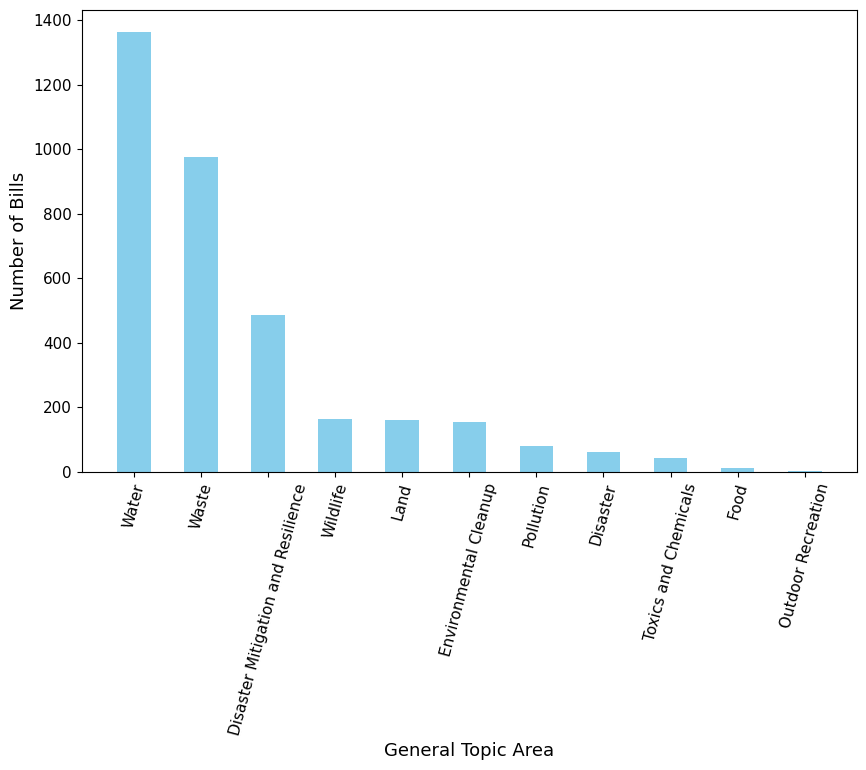

In [1787]:
cat = topics_gen["primary_topic"]
vals = topics_gen["numbills_total"]


plt.figure(figsize=(10,6))
plt.bar(cat, vals, color='skyblue', width=0.5)

#create bar plot with custom aesthetics
# topics_gen.plot(kind='bar', title='Number of Bills by Topic Area',
#                ylabel='Number of Bills', xlabel='General Topic Area', figsize=(10, 6),
#                color = "lightsteelblue", textsize = 20)

#rotate x-axis ticks vertically
plt.xticks(rotation=75)

plt.xlabel('General Topic Area', fontsize = 13)
plt.ylabel('Number of Bills', fontsize = 13)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)


plt.savefig(figures_path + "billscount_subset.jpg", bbox_inches='tight')
plt.show()

In [1761]:
topics_to_merge = new_topics[["bill_id", "new_list", "primary_topic", "num_topics"]]
topics_to_merge

,bill_id,new_list,primary_topic,num_topics
0,18193.0,[Water-Conservation/Efficiency],Water,1.0
1,23535.0,[Water-Conservation/Efficiency],Water,1.0
2,182994.0,[Waste and Recycling],Waste,1.0
3,183000.0,[Waste and Recycling],Waste,1.0
4,183003.0,[Water-Conservation/Efficiency],Water,1.0
...,...,...,...,...
4042,ocd-bill/5897aed2-f956-4d27-8c1f-4d2e9475d18f,[Water-Resources/Planning],Water,1.0
4043,ocd-bill/366f5e03-c586-4c05-9171-39bf19c32b2a,[Waste and Recycling],Waste,1.0
4044,ocd-bill/38102c75-0fb6-481b-9c19-8fa09b649b4f,[Water-Resources/Planning],Water,1.0
4045,ocd-bill/8033644d-8c15-410b-9952-83ce3f050fd3,[Waste and Recycling],Waste,1.0


In [1762]:
dfa_raw = pd.merge(data_avail, topics_to_merge, on = "bill_id", how = "left")

In [1763]:
dfa = dfa_raw.drop_duplicates("bill_id")
dfa["primary_topic"] = np.where(dfa["primary_topic_y"].isna(), dfa["primary_topic_x"], dfa["primary_topic_y"])
dfa["num_topics"] = np.where(dfa["num_topics_y"].isna(), dfa["num_topics_x"], dfa["num_topics_y"])
#data_avail["state"] = np.where(data_avail["state_x"].isna(), data_avail["state"], data_avail["state_x"])

dfa.drop(["primary_topic_x","num_topics_x","primary_topic_y", "num_topics_y"], inplace = True, axis = 1)

In [1765]:
unique_vote_df = new_vote_df.drop_duplicates(subset = ["bill_id", "desc"])
unique_vote_df

,bill_id,roll_call_id,people_id,vote_id,vote_text,date,desc,yea,nay,nv,absent,total,passed,chamber,chamber_id
0,18193.0,18193.0,1360.0,1.0,Yea,2010-06-16,Senate Floor Vote - Final Passage,60.0,1.0,1.0,0.0,62.0,1.0,S,74.0
0,23535.0,23535.0,1572.0,3.0,NV,2009-11-04,W/O REF. TO FILE SB1 Simitian Concurrence,27.0,7.0,6.0,0.0,40.0,1.0,S,20.0
0,182994.0,182994.0,3646.0,1.0,Yea,2012-04-04,House: Appropriations and Budget Committee: DO...,12.0,0.0,0.0,0.0,12.0,1.0,H,79.0
0,183000.0,183000.0,4495.0,1.0,Yea,2012-03-30,Third Reading Passed,45.0,1.0,0.0,1.0,47.0,1.0,S,50.0
0,183003.0,183003.0,4495.0,1.0,Yea,2012-03-30,Third Reading Passed,46.0,0.0,0.0,1.0,47.0,1.0,S,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1528707.0,1528707.0,1622.0,1.0,Yea,2025-03-27,Senate: Third Reading RCS#5,38.0,0.0,0.0,1.0,39.0,1.0,S,28.0
0,1545295.0,1545295.0,5664.0,1.0,Yea,2025-04-10,JUD Vote Tally Sheet (Joint Favorable Substitute),39.0,0.0,0.0,2.0,41.0,1.0,J,108.0
0,1545173.0,1545173.0,8383.0,1.0,Yea,2025-04-10,Senate Transportation and Culture and the Arts...,5.0,0.0,0.0,0.0,5.0,1.0,S,32.0
0,1547891.0,1547891.0,8622.0,1.0,Yea,2025-04-14,Third Reading,96.0,1.0,3.0,0.0,100.0,1.0,H,17.0


In [1659]:
dfa.to_csv("/Users/eclin/Desktop/MA Thesis/02 MA Thesis Current Project/Data For Analysis/VOTINGONLY_data_with_cleaned_topic_0505.csv", index = False)

In [1660]:
legiscan_votes_id = list(pd.unique(unique_vote_df["bill_id"]))

In [1661]:
all_vote_info = pd.merge(new_vote_df, updated_all_voter_info, left_on = "people_id", right_on = "people_id", how = "left")
all_vote_info

,bill_id,roll_call_id,people_id,vote_id,vote_text,date,desc,yea,nay,nv,...,district,ftm_eid,votesmart_id,opensecrets_id,knowwho_pid,ballotpedia,bioguide_id,committee_sponsor,committee_id,state_federal
0,18193.0,18193.0,1360.0,1.0,Yea,2010-06-16,Senate Floor Vote - Final Passage,60.0,1.0,1.0,...,SD-013,13009220,44194,,212470,Jose_Peralta,,0,0,0
1,18193.0,18193.0,1401.0,1.0,Yea,2010-06-16,Senate Floor Vote - Final Passage,60.0,1.0,1.0,...,SD-020,4532875,69129,,250884,Eric_Adams_(New_York),,0,0,0
2,18193.0,18193.0,1402.0,1.0,Yea,2010-06-16,Senate Floor Vote - Final Passage,60.0,1.0,1.0,...,SD-015,6485373,44931,,271824,Joseph_Addabbo,,0,0,0
3,18193.0,18193.0,1403.0,1.0,Yea,2010-06-16,Senate Floor Vote - Final Passage,60.0,1.0,1.0,...,SD-055,6640093,4207,,197647,James_Alesi,,0,0,0
4,18193.0,18193.0,1404.0,2.0,Nay,2010-06-16,Senate Floor Vote - Final Passage,60.0,1.0,1.0,...,SD-048,13009375,55431,,212469,Darrel_Aubertine,,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165562,1562094.0,1562094.0,26339.0,1.0,Yea,2025-04-30,Read 3rd time RV#1021,99.0,34.0,2.0,...,HD-077,59510012,163449,,0,Vincent_Perez,,0,0,0
165563,1562094.0,1562094.0,26340.0,2.0,Nay,2025-04-30,Read 3rd time RV#1021,99.0,34.0,2.0,...,HD-061,59509622,213432,,0,Keresa_Richardson,,0,0,0
165564,1562094.0,1562094.0,26341.0,2.0,Nay,2025-04-30,Read 3rd time RV#1021,99.0,34.0,2.0,...,HD-034,59509704,213362,,0,Denise_Villalobos,,0,0,0
165565,1562094.0,1562094.0,26342.0,1.0,Yea,2025-04-30,Read 3rd time RV#1021,99.0,34.0,2.0,...,HD-139,58713504,213505,,0,Charlene_Ward_Johnson,,0,0,0


In [1457]:
ca_votes = pd.read_json("/Users/eclin/Desktop/MA Thesis/02 MA Thesis Current Project/Data For Analysis/ca_all_voters.json")

In [1663]:
ca_bill_id = list(pd.unique(ca_votes["bill_id"]))

In [1617]:
ca_votes_only = ca_votes_final.drop_duplicates("bill_id")

In [1468]:
vote_tally_w = pd.DataFrame(ca_votes.groupby(["bill_id", "option"])["option"].count())
vote_tally_w = vote_tally_w.rename(columns={vote_tally_w.columns[0]: "vote_count"}).reset_index()
vote_tally_w

,bill_id,option,vote_count
0,ocd-bill/0023cb36-e628-4b68-b025-ccdb1207e18f,other,3
1,ocd-bill/0023cb36-e628-4b68-b025-ccdb1207e18f,yes,195
2,ocd-bill/007693f8-c5fe-42ef-b565-2017f3345fc8,other,7
3,ocd-bill/007693f8-c5fe-42ef-b565-2017f3345fc8,yes,112
4,ocd-bill/00840d1b-df97-4bcc-a156-4dfb9c56c3a7,not voting,2
...,...,...,...
2642,ocd-bill/ffcc0261-076c-49d9-84d0-05ef0dc9204c,yes,113
2643,ocd-bill/ffd1d55c-fe6a-4bbf-b2cc-bc1303db6151,other,7
2644,ocd-bill/ffd1d55c-fe6a-4bbf-b2cc-bc1303db6151,yes,112
2645,ocd-bill/fffc8f04-89d2-4d8f-ba34-cabb3e92d583,other,1


In [1607]:
vote_tally = vote_tally_w.pivot(index = "bill_id", columns = "option", values = "vote_count")
vote_tally = vote_tally.rename(columns={vote_tally.columns[0]: "nay", vote_tally.columns[1]: 
                                        "nv", vote_tally.columns[2]: "absent", vote_tally.columns[3]: "yay"}).reset_index()
vote_tally

option,bill_id,nay,nv,absent,yay
0,ocd-bill/0023cb36-e628-4b68-b025-ccdb1207e18f,NaN,NaN,3.0,195.0
1,ocd-bill/007693f8-c5fe-42ef-b565-2017f3345fc8,NaN,NaN,7.0,112.0
2,ocd-bill/00840d1b-df97-4bcc-a156-4dfb9c56c3a7,NaN,2.0,NaN,89.0
3,ocd-bill/00b7b179-15e2-4568-90ba-ad001edbcb75,NaN,NaN,4.0,116.0
4,ocd-bill/01372463-87ac-4092-b94e-e1f193fa5963,32.0,NaN,12.0,194.0
...,...,...,...,...,...
1066,ocd-bill/ff833e10-8885-4031-887d-09652ce8dd32,NaN,NaN,1.0,117.0
1067,ocd-bill/ffc27f20-4697-47f3-a8f0-5f6587dcf5d7,27.0,NaN,8.0,85.0
1068,ocd-bill/ffcc0261-076c-49d9-84d0-05ef0dc9204c,1.0,NaN,3.0,113.0
1069,ocd-bill/ffd1d55c-fe6a-4bbf-b2cc-bc1303db6151,NaN,NaN,7.0,112.0


In [1609]:
vote_tally["total"] = vote_tally["nay"] + vote_tally["nv"] + vote_tally["yay"]

In [1710]:
ca_votes_final = pd.merge(ca_votes, vote_tally, on = "bill_id", how = "left")

In [1793]:
ca_votes_final.columns

Index(['bill_num', 'year', 'description', 'status', 'status_location',
       'author', 'author_affil', 'addtl_authors_flag', 'topics', 'summary',
       ...
       'voter_id', 'note', 'voter_lastname', 'voter_affil',
       'voter_affil_clean', 'nay', 'nv', 'absent', 'yay', 'total'],
      dtype='object', length=2879)

In [1668]:
FINAL_voting_data = dfa[(dfa["bill_id"].isin(ca_bill_id)) | (dfa["bill_id"].isin(legiscan_votes_id))]

In [1676]:
FINAL_voting_data

,bill_num,year,description,status,status_location,author,author_affil,addtl_authors_flag,topics,summary,...,voter_name,voter_id,note,voter_lastname,voter_affil,voter_affil_clean,yay,new_list,primary_topic,num_topics
0,PA H 1705,2008,Water Resources Compact,Enacted,Chapter,Harkins,D,1,Water-Conservation/Efficiency,Authorizes the Commonwealth to join the Great ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Water-Conservation/Efficiency],Water,1.0
1,VA H 1229,2008,Water Sense and Energy Star Products Sales Tax,Enacted,Act No. 554,Vanderhye,D,0,Water-Conservation/Efficiency,Adds WaterSense products and additional Energy...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Water-Conservation/Efficiency],Water,1.0
2,HI HCR 43,2009,Polystyrene and Food Containers,Failed,Adjourned - Senate Energy and Environment Comm...,Yamane,D,0,Waste and Recycling,Requests the department of health to investiga...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Waste and Recycling],Waste,1.0
3,HI HR 49,2009,Noncompostable Plastic Bag Reduction,Failed,Adjourned - House Energy and Environmental Pro...,Berg,D,0,Waste and Recycling,Urges the city and county of Honolulu and Kaua...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Waste and Recycling],Waste,1.0
4,HI HR 52,2009,PVC and HDPE Pipe for Potable Water Systems,Adopted,Adopted,Herkes,D,0,Water-Conservation/Efficiency,Urges the use of poluvinyl chloride and high-d...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Water-Conservation/Efficiency],Water,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4042,CA S 1317,2016,Groundwater Extraction Permit,Failed,"Adjourned - Assembly Water, Parks and Wildlife...",Wolk,D,0,Water-Resources/Planning,Requires a city or county overlying a basin de...,...,Anderson,ocd-person/7d4c2072-a3b2-44b4-af50-ed302a4b04b0,NaN,Anderson,Republican,R,21.0,[Water-Resources/Planning],Water,1.0
4043,CA A 1419,2016,Hazardous Waste: Cathode Ray Tube Glass,Enacted,Act No. 445,Eggman,D,1,Waste and Recycling,"Provides that used, broken cathode ray tube (C...",...,Bates,ocd-person/9ed8fe52-b020-47d3-92d5-621e32f42e94,NaN,Bates,Democratic,D,39.0,[Waste and Recycling],Waste,1.0
4044,CA A 2022,2016,Advanced Purified Demonstration Water,Enacted,Act No. 408,Gordon,D,1,Water-Resources/Planning,Authorizes the operator of an advanced purifie...,...,Beall,ocd-person/cd43be92-3cf2-46d0-9047-dd2d73d8b2fe,NaN,Beall,Democratic,D,38.0,[Water-Resources/Planning],Water,1.0
4045,CA A 2396,2016,Solid Waste: Annual Reports,Enacted,Act No. 466,McCarty,D,0,Waste and Recycling,Relates to the established integrated waste ma...,...,Hertzberg,ocd-person/d7e883c1-2011-45a1-b5bd-00e2046fa0fd,NaN,Hertzberg,Democratic,D,36.0,[Waste and Recycling],Waste,1.0


In [1693]:
with_voter_info_raw = pd.merge(new_vote_df, updated_all_voter_info, on = "people_id", how = "right")


In [1694]:
with_voter_info_raw["bill_id_str"] = with_voter_info_raw["bill_id"].astype(str)

In [1695]:
with_voter_info_raw["bill_id_str"]

0         182994.0
1         180546.0
2         190022.0
3         116156.0
4         186899.0
            ...   
165562    136046.0
165563    136046.0
165564    136046.0
165565    136046.0
165566    136046.0
Name: bill_id_str, Length: 165567, dtype: object

In [1704]:
bill_data_to_merge = FINAL_voting_data.drop(['voter_name', 'voter_id', 'note', 'voter_lastname', 'voter_affil','voter_affil_clean', "option"], axis = 1)
bill_data_to_merge["bill_id"] = bill_data_to_merge["bill_id"].astype(str)

In [1705]:
with_voter_info = pd.merge(bill_data_to_merge, with_voter_info_raw, left_on = "bill_id", right_on = "bill_id_str", how = "right")
with_voter_info

,bill_num,year,description,status,status_location,author,author_affil,addtl_authors_flag,topics,summary,...,ftm_eid,votesmart_id,opensecrets_id,knowwho_pid,ballotpedia,bioguide_id,committee_sponsor,committee_id,state_federal,bill_id_str
0,HI HCR 43,2009,Polystyrene and Food Containers,Failed,Adjourned - Senate Energy and Environment Comm...,Yamane,D,0,Waste and Recycling,Requests the department of health to investiga...,...,6591367,46099,,212489,Don_Armes,,0,0,0,182994.0
1,MT S 200,2009,Cleaning Products Containing Phosphorus,Enacted,Act No. 245,Erickson,D,0,Water-Conservation/Efficiency,Bans the sale of phosphorus-containing househo...,...,6591367,46099,,212489,Don_Armes,,0,0,0,180546.0
2,NV S 137,2009,Placement of Recycling Containers,Enacted,Act No. 222,Breeden,D,0,Waste and Recycling,Provides for the placement of recycling contai...,...,6591367,46099,,212489,Don_Armes,,0,0,0,190022.0
3,OK H 1884,2009,Waters And Water Rights,Enacted,Act No. 111,Richardson,R,0,Water-Conservation/Efficiency,Establishes a study group to review state and ...,...,6591367,46099,,212489,Don_Armes,,0,0,0,116156.0
4,HI S 492,2010,Instream Uses Of Water,Failed,"Adjourned - Senate Water, Land, Agriculture an...",Hee,D,0,Water-Conservation/Efficiency,Expands the considerations of the commission o...,...,6591367,46099,,212489,Don_Armes,,0,0,0,186899.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165562,NC H 1236,2009,Car Wash Water Use Efficiency,Enacted,Act No. 2009-480,Gibson,D,0,Water-Conservation/Efficiency,"Promotes voluntary, year-round water conservat...",...,6669194,59741,,249501,Jon_Greiner,,0,0,0,136046.0
165563,NC H 1236,2009,Car Wash Water Use Efficiency,Enacted,Act No. 2009-480,Gibson,D,0,Water-Conservation/Efficiency,"Promotes voluntary, year-round water conservat...",...,6648029,50609,,208592,Chris_Buttars,,0,0,0,136046.0
165564,NC H 1236,2009,Car Wash Water Use Efficiency,Enacted,Act No. 2009-480,Gibson,D,0,Water-Conservation/Efficiency,"Promotes voluntary, year-round water conservat...",...,6648029,50609,,208592,Chris_Buttars,,0,0,0,136046.0
165565,NC H 1236,2009,Car Wash Water Use Efficiency,Enacted,Act No. 2009-480,Gibson,D,0,Water-Conservation/Efficiency,"Promotes voluntary, year-round water conservat...",...,6461158,50206,,227247,Ross_Romero,,0,0,0,136046.0


In [1715]:
ca_votes_to_merge = ca_votes_final.rename(columns={'voter_lastname': 'last_name', "voter_affil" : "party"})

In [1717]:
FINAL_ALL_VOTERS = pd.concat([with_voter_info, ca_votes_to_merge]).reset_index()

In [1720]:
FINAL_ALL_VOTERS = FINAL_ALL_VOTERS.drop("level_0", axis = 1)

In [1722]:
FINAL_ALL_VOTERS.to_csv("/Users/eclin/Desktop/MA Thesis/02 MA Thesis Current Project/Data For Analysis/final_all_voters_df.csv", index = False)

In [1723]:
FINAL_voting_data.to_csv("/Users/eclin/Desktop/MA Thesis/02 MA Thesis Current Project/Data For Analysis/final_vote_of_case_only.csv", index = False)

In [1774]:
state_grouped = FINAL_voting_data.groupby(["state"]).agg({"state" : "count"})
state_grouped = state_grouped.rename(columns={state_grouped.columns[0]: "num_bills"})
state_grouped = state_grouped.sort_values(by='num_bills', ascending = False).reset_index()
print(state_grouped.to_latex(index=False))

\begin{tabular}{lr}
\toprule
state & num_bills \\
\midrule
CA & 1071 \\
MN & 236 \\
HI & 233 \\
CT & 220 \\
FL & 202 \\
MD & 201 \\
CO & 155 \\
OK & 153 \\
AZ & 134 \\
RI & 133 \\
NH & 123 \\
NC & 116 \\
TX & 97 \\
VT & 95 \\
OR & 87 \\
MT & 87 \\
IN & 68 \\
ID & 68 \\
NM & 58 \\
WY & 53 \\
NV & 51 \\
GA & 44 \\
MS & 34 \\
VA & 32 \\
AR & 30 \\
WI & 28 \\
LA & 26 \\
KS & 26 \\
MO & 24 \\
ND & 20 \\
AL & 18 \\
MI & 18 \\
WV & 17 \\
NY & 15 \\
ME & 14 \\
KY & 13 \\
UT & 8 \\
SD & 7 \\
IL & 7 \\
MA & 5 \\
DE & 5 \\
PA & 5 \\
SC & 4 \\
OH & 3 \\
NJ & 3 \\
\bottomrule
\end{tabular}



In [1778]:
state_df = {"abbrev" : [],
           "name" : []}
for key, val in state_dict.items():
    state_df["abbrev"].append(key)
    state_df["name"].append(val)

statesdf = pd.DataFrame(state_df)
statesdf["name_lower"] = statesdf["name"].str.lower()

In [1779]:
dagg = FINAL_voting_data.groupby(["state"]).agg({"status" : "count"})
dstate_sum = pd.DataFrame(dagg)
dstate_sum = dstate_sum.rename(columns={dstate_sum.columns[0]: "numbills"})
dstate_sum = dstate_sum.reset_index()
dss = pd.merge(dstate_sum, statesdf, how = "outer", left_on = "state", right_on = "abbrev")
dss = dss[~dss["abbrev"].isna()]
dss["state"] = np.where(dss["state"].isna(), dss["abbrev"], dss["state"])
dss["numbills"] = np.where(dss["numbills"].isna(), 0, dss["numbills"])
dss.to_csv("post_filter_bills.csv")